In [239]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
year = '2008-01-01'
gold = yf.download('GLD', start = year)
stock = yf.download('IVV', start = year)
bond = yf.download('BND', start = year)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [240]:
gold_ch = gold['Adj Close'].pct_change()
stock_ch = stock['Adj Close'].pct_change()
bond_ch = bond['Adj Close'].pct_change()

In [325]:
volatility_data = pd.DataFrame({'Asset':['Gold ETF', 'S&P500 ETF', 'Bonds ETF'], 'Volatility': [gold_ch.std(), stock_ch.std(), bond_ch.std()]})

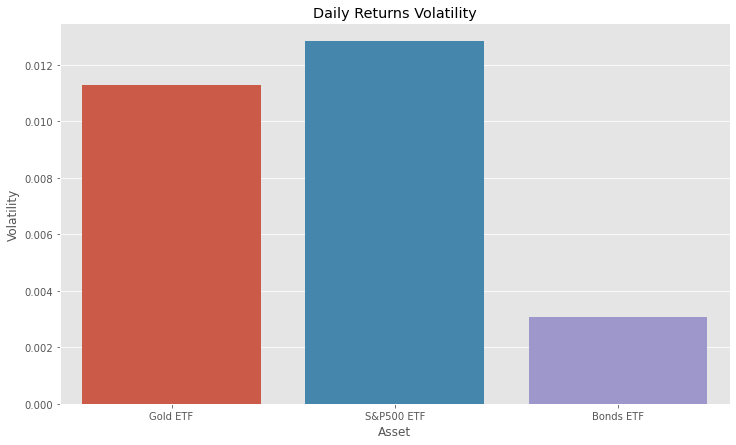

In [326]:
plt.figure(figsize = (12, 7))
sns.barplot(data = volatility_data, x = 'Asset', y = 'Volatility')
plt.title('Daily Returns Volatility')
plt.show()

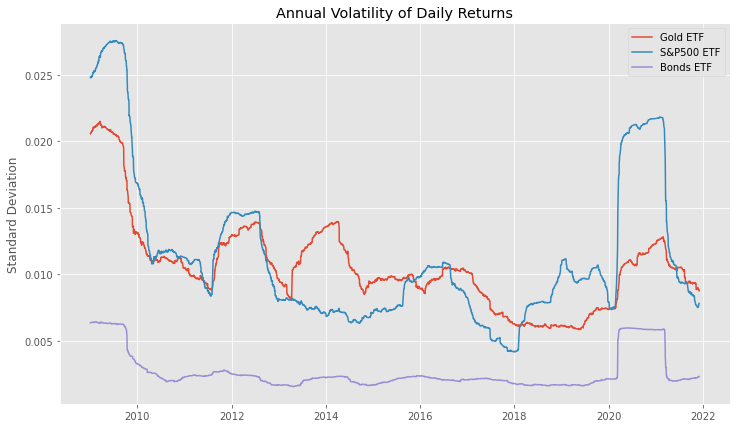

In [266]:
plt.figure(figsize = (12, 7))
plt.plot(gold_ch.rolling(253).std(), label = 'Gold ETF')
plt.plot(stock_ch.rolling(253).std(), label = 'S&P500 ETF')
plt.plot(bond_ch.rolling(253).std(), label = 'Bonds ETF')
plt.title("Annual Volatility of Daily Returns")
plt.legend()
plt.ylabel("Standard Deviation")
plt.show()

In [244]:
volatility_data_minus2020 = pd.DataFrame({'Asset':['Gold ETF', 'S&P500 ETF', 'Bonds ETF'], 'Volatility': [gold_ch[gold_ch.index.year < 2020].std(), stock_ch[stock_ch.index.year < 2020].std(), bond_ch[bond_ch.index.year < 2020].std()]})

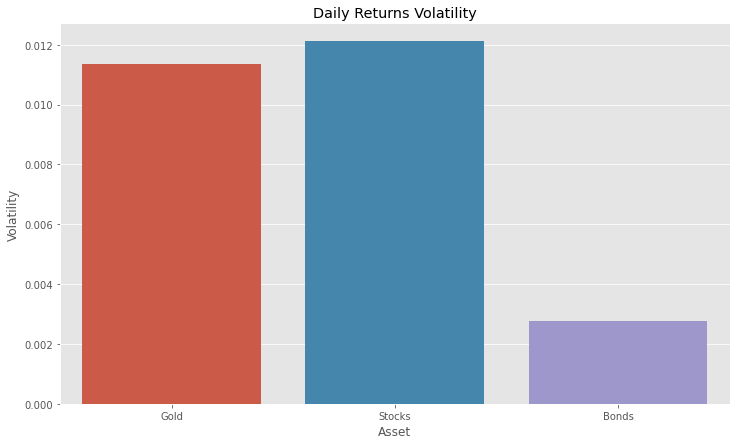

In [245]:
plt.figure(figsize = (12, 7))
sns.barplot(data = volatility_data_minus2020, x = 'Asset', y = 'Volatility')
plt.title('Daily Returns Volatility')
plt.show()

In [246]:
print(stock_ch.corr(gold_ch))
print(stock_ch.corr(bond_ch))

0.022630308345367074
-0.08626509089153674


In [247]:
sp500 = yf.download('^GSPC', start = '2008-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [249]:
sp500_change = sp500.pct_change()

In [250]:
sp500_change

Date
2008-01-02         NaN
2008-01-03    0.000000
2008-01-04   -0.024552
2008-01-07    0.003223
2008-01-08   -0.018352
                ...   
2021-11-29    0.013200
2021-11-30   -0.018961
2021-12-01   -0.011815
2021-12-02    0.014194
2021-12-03   -0.008449
Name: Adj Close, Length: 3507, dtype: float64

In [251]:
change = pd.concat([gold_ch, stock_ch, bond_ch, sp500_change], axis = 1)

In [252]:
change.columns = ['Gold ETF', 'Stocks ETF', 'Bonds ETF', 'S&P500']

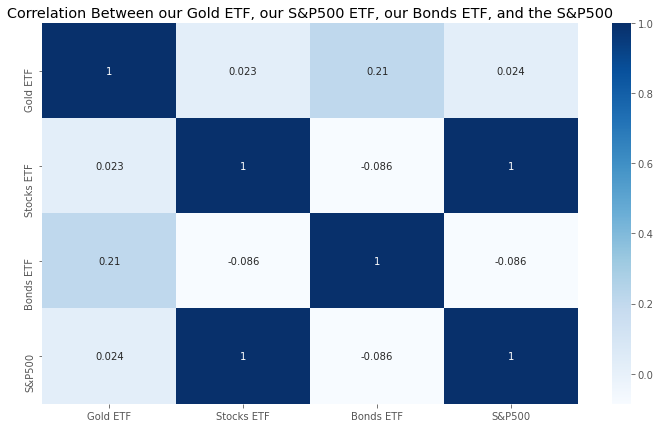

In [253]:
plt.figure(figsize = (12, 7))
sns.heatmap(change.corr(), annot = True, cmap = 'Blues')
plt.title("Correlation Between our Gold ETF, our S&P500 ETF, our Bonds ETF, and the S&P500")
plt.show()

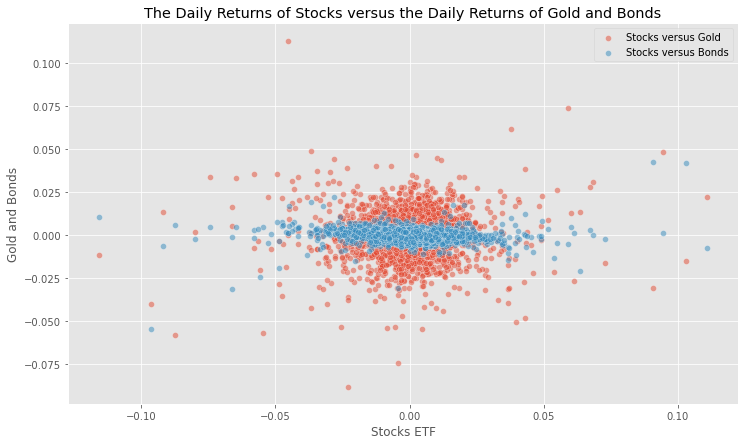

In [254]:
plt.figure(figsize = (12, 7))
plt.style.use('ggplot')
sns.scatterplot(data = change, x = 'Stocks ETF', y = 'Gold ETF', label = 'Stocks versus Gold', alpha = 0.5)
sns.scatterplot(data = change, x = 'Stocks ETF', y = 'Bonds ETF', label = 'Stocks versus Bonds', alpha = 0.5)
plt.ylabel("Gold and Bonds")
plt.title("The Daily Returns of Stocks versus the Daily Returns of Gold and Bonds")
plt.show()

In [255]:
change["Stock-Bond Portfolio"] = 0.8 * change["Stocks ETF"] + 0.2 * change["Bonds ETF"]
change["Stock-Gold Portfolio"] = 0.8 * change["Stocks ETF"] + 0.2 * change["Gold ETF"]

In [256]:
volatility_portfolio = pd.DataFrame({'Portfolio':['Stock-Bond', 'Stock-Gold'], 'Volatility': [change['Stock-Bond Portfolio'].std(), change['Stock-Gold Portfolio'].std()]})

In [257]:
change

,Gold ETF,Stocks ETF,Bonds ETF,S&P500,Stock-Bond Portfolio,Stock-Gold Portfolio
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.008367,-0.001311,0.001293,0.000000,-0.000791,0.000624
2008-01-04,-0.005142,-0.024322,0.001162,-0.024552,-0.019226,-0.020486
2008-01-07,-0.004229,0.004462,0.000258,0.003223,0.003621,0.002723
2008-01-08,0.023711,-0.018473,0.001031,-0.018352,-0.014572,-0.010036
...,...,...,...,...,...,...
2021-11-29,-0.001379,0.012765,-0.000117,0.013200,0.010189,0.009937
2021-11-30,-0.006722,-0.019014,0.001876,-0.018961,-0.014836,-0.016556
2021-12-01,0.003988,-0.011669,0.000645,-0.011815,-0.009206,-0.008537


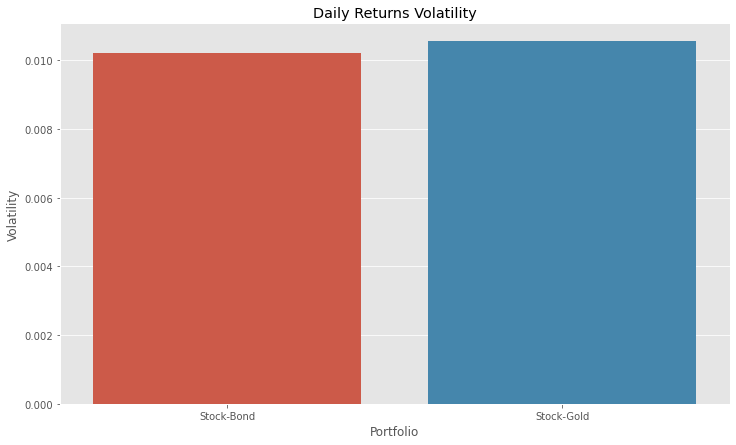

In [258]:
plt.figure(figsize = (12, 7))
sns.barplot(data = volatility_portfolio, x = 'Portfolio', y = 'Volatility')
plt.title('Daily Returns Volatility')
plt.show()

In [259]:
volatility_portfolio

,Portfolio,Volatility
0,Stock-Bond,0.010224
1,Stock-Gold,0.010553


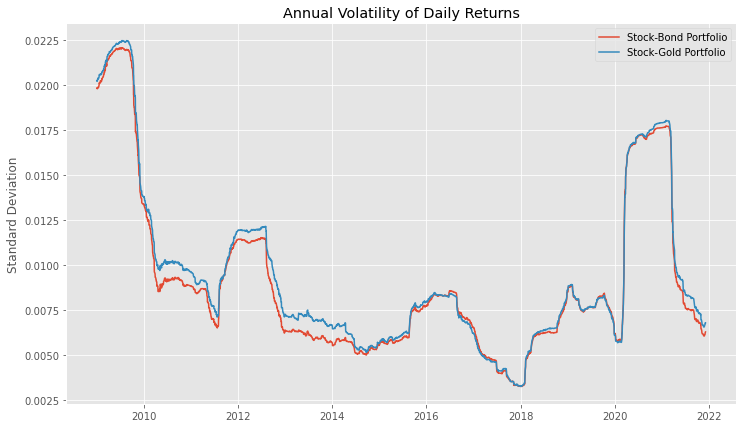

In [265]:
plt.figure(figsize = (12, 7))
plt.plot(change['Stock-Bond Portfolio'].rolling(253).std(), label = "Stock-Bond Portfolio")
plt.plot(change['Stock-Gold Portfolio'].rolling(253).std(), label = "Stock-Gold Portfolio")
plt.title("Annual Volatility of Daily Returns")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

In [283]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [312]:
# All data is stationary
print("P Value: %f" % adfuller(change['Stock-Bond Portfolio'][1:] * 100)[1])
print("P Value: %f" % adfuller(change['Stock-Gold Portfolio'][1:] * 100)[1])
print("P Value: %f" % adfuller(change['S&P500'][1:] * 100)[1])

P Value: 0.000000
P Value: 0.000000
P Value: 0.000000


In [316]:
X = change['S&P500'][1:] * 100
X = sm.add_constant(X)
y = change['Stock-Bond Portfolio'][1:] * 100
model = sm.OLS(y, X).fit()

In [317]:
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Stock-Bond Portfolio   R-squared:                       0.991
Model:                              OLS   Adj. R-squared:                  0.991
Method:                   Least Squares   F-statistic:                 3.667e+05
Date:                  Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                          12:11:52   Log-Likelihood:                 3117.1
No. Observations:                  3506   AIC:                            -6230.
Df Residuals:                      3504   BIC:                            -6218.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.002

In [318]:
y1 = change['Stock-Gold Portfolio'][1:] * 100
model1 = sm.OLS(y1, X).fit()

In [319]:
print(model1.summary())

                             OLS Regression Results                             
Dep. Variable:     Stock-Gold Portfolio   R-squared:                       0.949
Model:                              OLS   Adj. R-squared:                  0.949
Method:                   Least Squares   F-statistic:                 6.548e+04
Date:                  Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                          12:12:01   Log-Likelihood:                 60.831
No. Observations:                  3506   AIC:                            -117.7
Df Residuals:                      3504   BIC:                            -105.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.004

In [299]:
model.params

const     0.000099
S&P500    0.781402
dtype: float64

In [300]:
model1.params

const     0.000116
S&P500    0.789564
dtype: float64

In [302]:
sen = pd.DataFrame({"Portfolio": ["Stock-Bond Portfolio", "Stock-Gold Portfolio"], 'Betas': [model.params[1], model1.params[1]]})

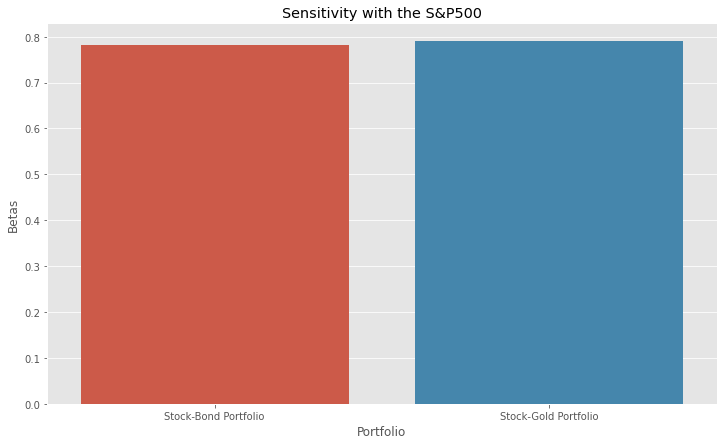

In [306]:
plt.figure(figsize = (12, 7))
sns.barplot(data = sen, x = 'Portfolio', y = 'Betas')
plt.title("Sensitivity with the S&P500")
plt.show()

In [327]:
change.mean()

Gold ETF                0.000256
Stocks ETF              0.000487
Bonds ETF               0.000154
S&P500                  0.000411
Stock-Bond Portfolio    0.000420
Stock-Gold Portfolio    0.000441
dtype: float64